In [5]:
import numpy as np
import pandas as pd

In [6]:
data = pd.read_csv('data/spam.csv', encoding='latin-1')

In [7]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Process flow of the project

1. Data Cleaning
2. Explaratory Data Analysis
3. Text Preprocessing
4. Model building
5. Evaluation
6. Improvement

### 1. Data Cleaning

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [10]:
# drop the last three columns because of most missing vakues

data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1, inplace=True)
data.sample(5)

,v1,v2
2065,ham,Cos daddy arranging time c wat time fetch Ì_ m...
1992,spam,Free tones Hope you enjoyed your new content. ...
828,ham,"Sorry light turned green, I meant another frie..."
4352,ham,Fun fact: although you would think armand woul...
3287,spam,Someone U know has asked our dating service 2 ...


In [11]:
# rename the columns
data.rename(columns={"v1": "target", "v2": "text"}, inplace=True)
data.sample()

,target,text
3488,ham,I'm also came to room.


In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [15]:
encoder.fit_transform(data["target"])

array([0, 0, 1, ..., 0, 0, 0], shape=(5572,))

In [16]:
# ham = 0 and spam = 1
data["target"] = encoder.fit_transform(data["target"])

In [17]:
data.sample(5)

,target,text
1791,0,U havenåÕt lost me ill always b here 4u.i didn...
5398,0,Hi. Hope you had a good day. Have a better night.
3615,0,Can you please ask macho what his price range ...
4700,0,I liked the new mobile
1731,0,Lol. Well quality aint bad at all so i aint co...


In [18]:
# check for missing values
data.isnull().sum()

target    0
text      0
dtype: int64

In [19]:
# check for duplicate
data.duplicated().sum()

np.int64(403)

In [20]:
# remove the duplicates
data = data.drop_duplicates(keep="first")

In [21]:
data.duplicated().sum()

np.int64(0)

In [22]:
data.shape

(5169, 2)

### 2. Exploratory Data Analysis

In [23]:
data["target"].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [24]:
import matplotlib.pyplot as plt

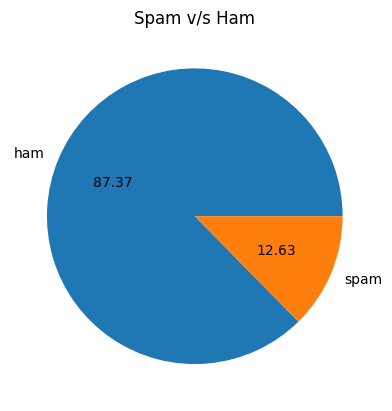

In [25]:
plt.pie(data["target"].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.title("Spam v/s Ham")
plt.show()

In [26]:
# data is imbalanced

In [27]:
!pip install nltk


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
data['num_characters'] = data['text'].apply(len)

In [30]:
data.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [31]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [32]:
# number of words

data['num_words'] = data['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [33]:
data.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [34]:
data['num_sentences'] = data['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [35]:
data.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [36]:
data[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [37]:
# for ham messages
data[data['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [38]:
# for spam messages
data[data['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [39]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

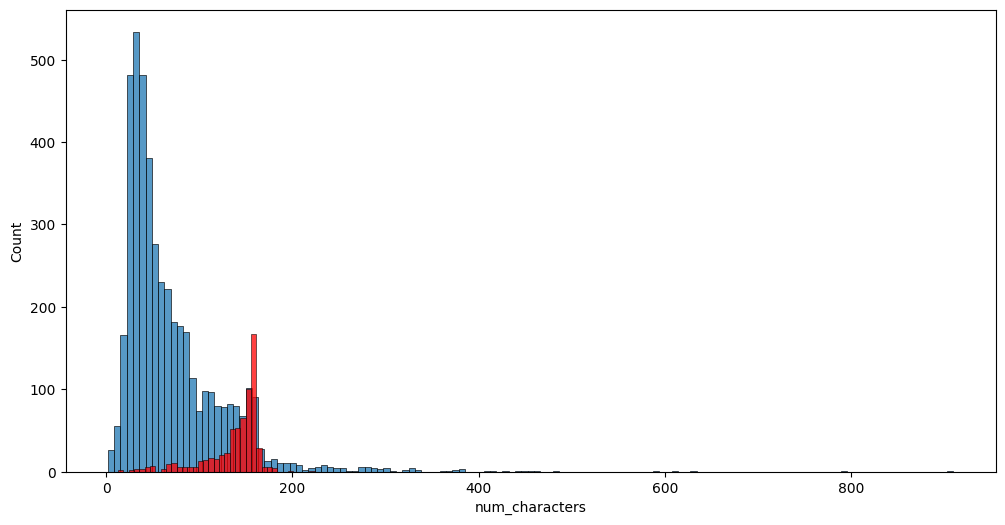

In [40]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['target']==0]['num_characters'])
sns.histplot(data[data['target']==1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

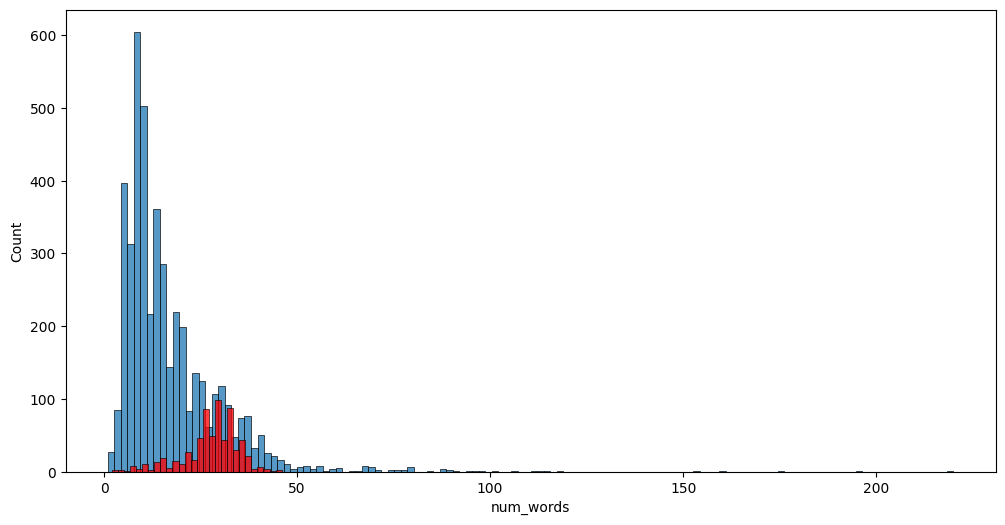

In [41]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['target']==0]['num_words'])
sns.histplot(data[data['target']==1]['num_words'], color='red')

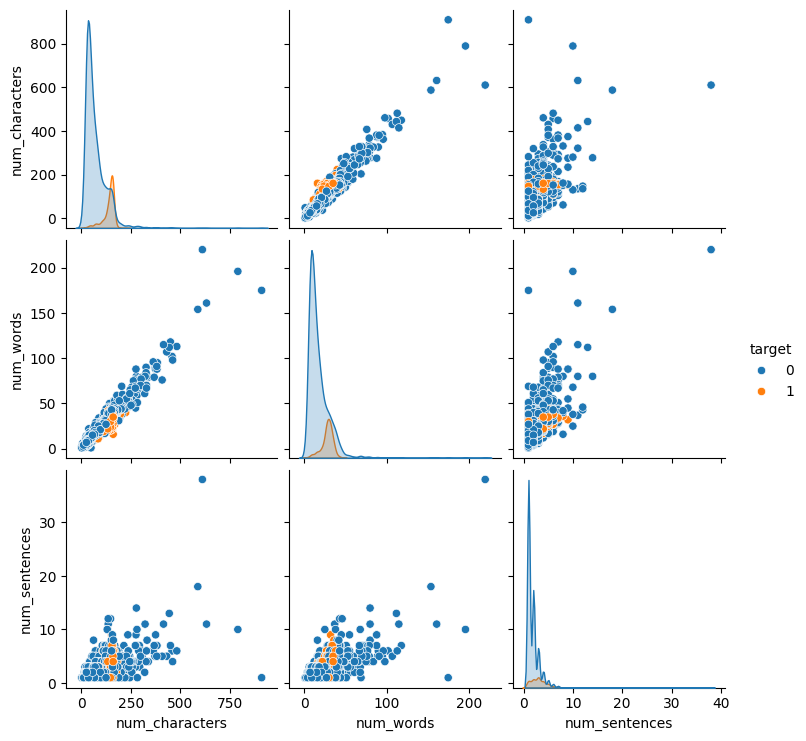

In [42]:
sns.pairplot(data, hue='target')

### 3. Data Preprocessing

1. lower case
2. Tokenization#
3. Removing special characters
4. Removing stop words and punctuation
5. Stemming

In [43]:
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [44]:
import string
ps = PorterStemmer()

In [45]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    buffer = []
    for i in text:
        if i.isalnum():
            buffer.append(i)
            
    text = buffer[:]
    buffer.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            buffer.append(i)

    text = buffer[:]
    buffer.clear()

    for i in text:
        buffer.append(ps.stem(i))
    return " ".join(buffer)

In [46]:
transform_text('I love travelling so I travel a lot! what about you?')

'love travel travel lot'

In [47]:
transform_text(data['text'][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [48]:
data['transfomed_text'] = data['text'].apply(transform_text)

In [49]:
data.head()

,target,text,num_characters,num_words,num_sentences,transfomed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [50]:
data.rename(columns={'transfomed_text':'transformed_text'}, inplace=True)

In [52]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [53]:
spam_wc = wc.generate(data[data['target']==1]['transformed_text'].str.cat(sep=" "))

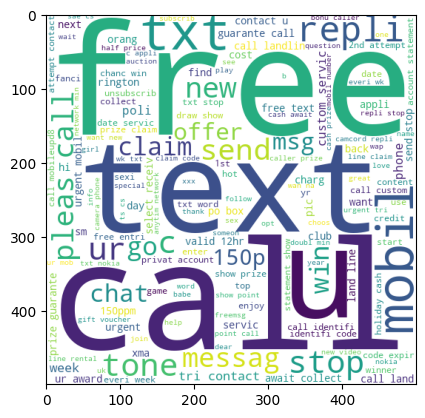

In [54]:
plt.imshow(spam_wc)

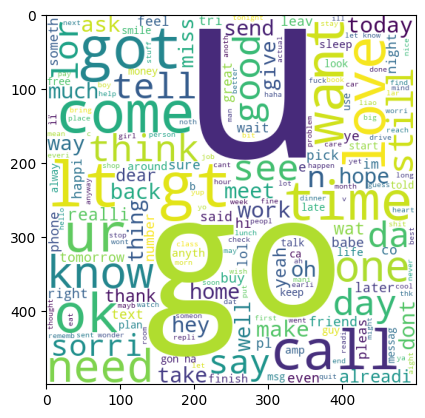

In [55]:
ham_wc = wc.generate(data[data['target']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [56]:
data.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [57]:
spam_corpus = []
for msg in data[data['target'] == 1]['transformed_text'].to_list():
    for word in msg.split():
        spam_corpus.append(word)

In [58]:
from collections import Counter

most_30_words = pd.DataFrame(Counter(spam_corpus).most_common(30))
most_30_words

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [59]:
most_30_words[0]

0        call
1        free
2           2
3         txt
4        text
5           u
6          ur
7       mobil
8        stop
9       repli
10      claim
11          4
12      prize
13        get
14        new
15     servic
16       tone
17       send
18     urgent
19      nokia
20    contact
21      award
22      phone
23       cash
24      pleas
25       week
26        win
27          c
28    collect
29        min
Name: 0, dtype: object

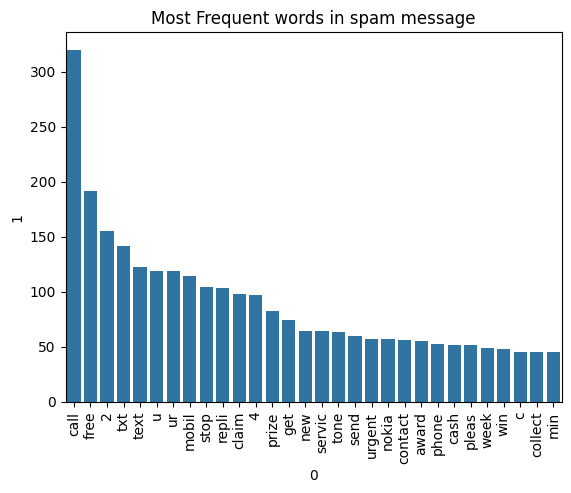

In [60]:
sns.barplot(x=most_30_words[0], y=most_30_words[1])
plt.xticks(rotation='vertical')
plt.title('Most Frequent words in spam message')
plt.show()

In [61]:
ham_corpus = []
for msg in data[data['target']==0]['transformed_text'].to_list():
    for word in msg:
        ham_corpus.append(word)

In [62]:
most_30_ham = pd.DataFrame(Counter(ham_corpus).most_common(30))
most_30_ham

,0,1
0,,30897
1,e,15302
2,a,12337
3,t,11561
4,o,11323
5,i,9576
6,n,8891
7,r,8651
8,l,8634
9,s,7249


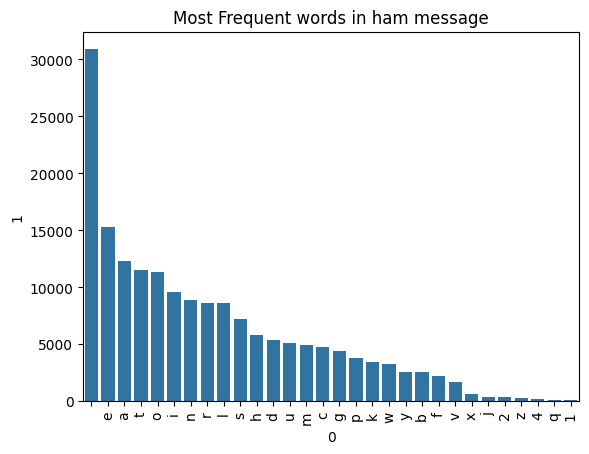

In [63]:
sns.barplot(x=most_30_ham[0], y=most_30_ham[1])
plt.xticks(rotation='vertical')
plt.title('Most Frequent words in ham message')
plt.show()

## 4. Model Building

In [64]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [65]:
X = cv.fit_transform(data['transformed_text']).toarray()

In [66]:
X.shape

(5169, 6708)

In [67]:
y = data['target']
y.shape

(5169,)

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [69]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [70]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [71]:
gnb.fit(X_train, y_train)
y_preds1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_preds1))
print(confusion_matrix(y_test, y_preds1))
print(precision_score(y_test, y_preds1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [72]:
mnb.fit(X_train, y_train)
y_preds2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_preds2))
print(confusion_matrix(y_test, y_preds2))
print(precision_score(y_test, y_preds2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [73]:
bnb.fit(X_train, y_train)
y_preds3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_preds3))
print(confusion_matrix(y_test, y_preds3))
print(precision_score(y_test, y_preds3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [75]:
X = tfidf.fit_transform(data['transformed_text']).toarray()

In [76]:
tfidf_ = tfidf.fit_transform(data['transformed_text']).toarray()

In [149]:
y = data['target']

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [151]:
gnb.fit(X_train, y_train)
y_preds1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_preds1))
print(confusion_matrix(y_test, y_preds1))
print(precision_score(y_test, y_preds1))

0.8858800773694391
[[798 105]
 [ 13 118]]
0.5291479820627802


In [152]:
mnb.fit(X_train, y_train)
y_preds2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_preds2))
print(confusion_matrix(y_test, y_preds2))
print(precision_score(y_test, y_preds2))

0.9642166344294004
[[903   0]
 [ 37  94]]
1.0


In [153]:
bnb.fit(X_train, y_train)
y_preds3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_preds3))
print(confusion_matrix(y_test, y_preds3))
print(precision_score(y_test, y_preds3))

0.9690522243713733
[[899   4]
 [ 28 103]]
0.9626168224299065


In [154]:
# tfidf vectirizer and Multi-naive bayes model is the better option because precision matters due to data imbalance

In [155]:
# compare different models

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [156]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [158]:
classifiers = {
    'SVC': svc,
    'KN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost':abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'XGB':xgb,
}

In [159]:
def train_classifiers(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    return accuracy, precision

In [162]:
accuracy_scores, precision_scores = [], []

for name, clf in classifiers.items():
    current_acc, current_prec = train_classifiers(clf, X_train, y_train, X_test, y_test)
    print(f"For {name}")
    print(f"Accuracy: {current_acc}")
    print(f"Precision: {current_prec}")

    accuracy_scores.append(current_acc)
    precision_scores.append(current_prec)

For SVC
Accuracy: 0.9777562862669246
Precision: 0.9736842105263158
For KN
Accuracy: 0.9119922630560928
Precision: 1.0
For NB
Accuracy: 0.9642166344294004
Precision: 1.0
For DT
Accuracy: 0.9352030947775629
Precision: 0.82
For LR
Accuracy: 0.9593810444874274
Precision: 0.968421052631579


D:\learn\email_spam_classifier\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
D:\learn\email_spam_classifier\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(


For RF
Accuracy: 0.9729206963249516
Precision: 1.0
For AdaBoost
Accuracy: 0.9323017408123792
Precision: 0.8505747126436781
For BgC
Accuracy: 0.9584139264990329
Precision: 0.8548387096774194
For ETC
Accuracy: 0.971953578336557
Precision: 1.0
For GBDT
Accuracy: 0.9564796905222437
Precision: 0.967391304347826
For XGB
Accuracy: 0.9642166344294004
Precision: 0.9351851851851852


In [163]:
import pandas as pd

In [164]:
performance_df = pd.DataFrame({'Algorithms':classifiers.keys(), 'Accuracy':accuracy_scores, 'Precision':precision_scores})

In [165]:
performance_df.head()

,Algorithms,Accuracy,Precision
0,SVC,0.977756,0.973684
1,KN,0.911992,1.000000
2,NB,0.964217,1.000000
3,DT,0.935203,0.820000
4,LR,0.959381,0.968421


In [169]:
performance_df1 = pd.melt(performance_df, id_vars="Algorithms")

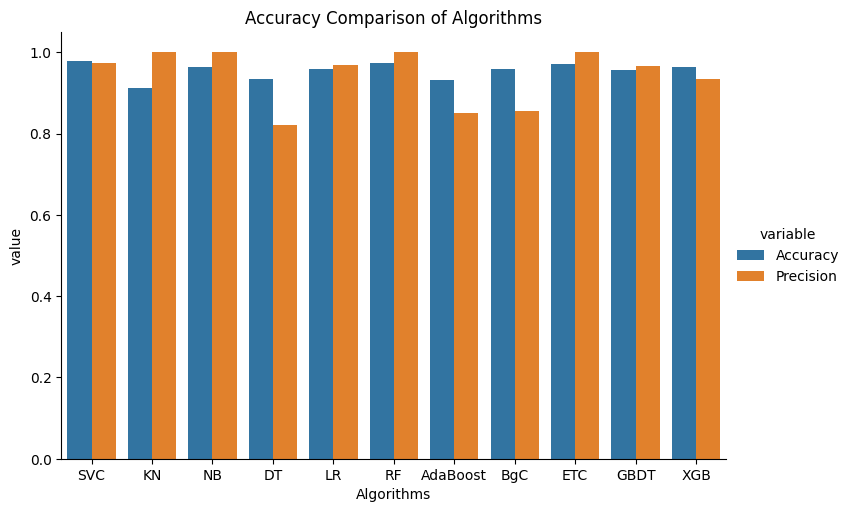

In [170]:
sns.catplot(
    x='Algorithms',
    y='value',
    hue='variable',
    data=performance_df1,
    kind='bar',
    height=5,
    aspect=1.5
)

plt.title('Accuracy Comparison of Algorithms')
plt.show()

## 5. Model Improvement

In [171]:
## try Voting classifier
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [172]:
voting = VotingClassifier(estimators=[('svc', svc), ('nb', mnb), ('et', etc)], voting='soft')

In [173]:
voting.fit(X_train, y_train)

,"estimators estimators: list of (str, estimator) tuplesInvoking the ``fit`` method on the ``VotingClassifier`` will fit clonesof those original estimators that will be stored in the class attribute``self.estimators_``. An estimator can be set to ``'drop'`` using:meth:`set_params`... versionchanged:: 0.21 ``'drop'`` is accepted. Using None was deprecated in 0.22 and support was removed in 0.24.","[('svc', ...), ('nb', ...), ...]"
,"voting voting: {'hard', 'soft'}, default='hard'If 'hard', uses predicted class labels for majority rule voting.Else if 'soft', predicts the class label based on the argmax ofthe sums of the predicted probabilities, which is recommended foran ensemble of well-calibrated classifiers.",'soft'
,"weights weights: array-like of shape (n_classifiers,), default=NoneSequence of weights (`float` or `int`) to weight the occurrences ofpredicted class labels (`hard` voting) or class probabilitiesbefore averaging (`soft` voting). Uses uniform weights if `None`.",None
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for ``fit``.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionadded:: 0.18",None
,"flatten_transform flatten_transform: bool, default=TrueAffects shape of transform output only when voting='soft'If voting='soft' and flatten_transform=True, transform method returnsmatrix with shape (n_samples, n_classifiers * n_classes). Ifflatten_transform=False, it returns(n_classifiers, n_samples, n_classes).",True
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting will be printed as itis completed... versionadded:: 0.23",False
,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'sigmoid'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",1.0
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0


In [174]:
y_pred = voting.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")

Accuracy: 0.9806576402321083
Precision: 1.0


In [175]:
estimators = [('svm', svc), ('nb', mnb), ('et', etc)]
from sklearn.ensemble import StackingClassifier

In [176]:
final_estimator = RandomForestClassifier()

In [177]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [178]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")

Accuracy: 0.9864603481624759
Precision: 0.9834710743801653


In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [83]:
X = tfidf.fit_transform(data['transformed_text'])
y = data['target']

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [184]:
mnb.fit(X_train, y_train)
y_preds = mnb.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_preds)}")
print(f"Precision: {precision_score(y_test, y_preds)}")

Accuracy: 0.9738878143133463
Precision: 1.0


In [85]:
import pickle

pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
# pickle.dump(mnb, open('model.pkl', 'wb'))

In [3]:
import nltk

In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True